<a href="https://colab.research.google.com/github/RichardPears/temp-workspace/blob/main/swiggy_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **swiggy case analysis - 1**

###**Solution:**

Before getting into the aspect of handling demand in a better way, it is useful to understand what drives demand during the peak hours. 
Peak demand on food delivery services occurs during peak dinner time which ranges between 8 – 10 PM and tapers beyond that, as for days of the week there is significant increase seen during weekends and a seasonality observed during occasions and festive holidays.

Increasing the fleet size to meet demand and reducing available restaurants to customers in their search radius does help with handling the problem but that increases expenses and reduces customer experience, hence it’s not the best way to handle peak demand hours.

The food aggregator model works around two major segments which has the following constrains.  





**A** - The total delivery time per order which consists (first mile time + last mile time + assignment delays) 

**B** – Availability of its hyperlocal delivery fleet to service any given order

1.	Demand on the customer side can only be offset by optimizing parameters controlled by Swiggy in agent assignment and grouping orders by clustering them by delivery time.

2.	Peak demand hours can be met by incentivizing the delivery fleet to operate actively during the peak hours, this will create a large pool of agents to which orders can be assigned.

3.	Dynamic pricing on delivery cost can help handle excessive demand on occasions and festive days when the fleet will not be capable to handle the surplus demand, this is meant to moderate the demand side and not to alienate customers with high cost.

4.	Balancing the availability of delivery agents in areas that have shown to have maximum demand using historical data.

5.	Demand is seen to shift in areas and is not uniform within a city, this can be used to push agents within the search radius to ensure that all delivery agents are continuously carrying out orders and no time is lost being idle.

6.	Restaurants that are overrun with orders and in-house dining should be able to limit the intake orders to ensure all deliveries are within the allotted time.

7.	Delivery agents can be intimated about the influx of orders that happen during peak hours in certain parts of the city so that less time is spent idle.

8.	Orders that are along the same delivery path of the agent should be grouped together as long it falls within the total delivery time hence it increases the total available agents in a given area to meet the demand.

9.	Since the time it takes for the restaurant in food preparation and the first mile time occurs in a parallel manner theses estimates can be kept to be as close to each other as possible thereby reducing the idle time from the delivery agent and the restaurant which in turn also improves overall availability of delivery agents.

10.	There should be load balancing in the assignment of agents in a manner which doesn’t create a drop of agents in a particular region at any given time this might cause the delivery times to go up.





#### **Data analysis**

The core driver for handling demand during peak hours resides in how effectively both aspects A and B are optimized.

The delivery agent pool and the delivery time associated with restaurants are to be derived from past deliveries, the data is not meant for an accurate depiction of the actual workflow but an estimation of how the delivery assignments ought to work in real time, this enables the process to optimize the various parameters of time delays to reduce idel and delays in the entire workflow.





In [47]:
import pandas as pd
import seaborn as sns
import folium
import numpy as np

In [48]:
train= pd.read_excel(r'Data_Train.xlsx')
test= pd.read_excel(r'Data_Test.xlsx')

In [49]:
df = pd.concat([train, test]).reset_index(drop = True)
print(df.isna().sum())


Restaurant          0
Location            0
Cuisines            0
Average_Cost        0
Minimum_Order       0
Rating              0
Votes               0
Reviews             0
Delivery_Time    2774
dtype: int64


In [50]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13868 entries, 0 to 13867
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     13868 non-null  object
 1   Location       13868 non-null  object
 2   Cuisines       13868 non-null  object
 3   Average_Cost   13868 non-null  object
 4   Minimum_Order  13868 non-null  object
 5   Rating         13868 non-null  object
 6   Votes          13868 non-null  object
 7   Reviews        13868 non-null  object
 8   Delivery_Time  11094 non-null  object
dtypes: object(9)
memory usage: 975.2+ KB


,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes
...,...,...,...,...,...,...,...,...,...
13863,ID_6342,Delhi University-GTB Nagar,"Fast Food, Chinese",₹100,₹50,NEW,-,-,NaN
13864,ID_8495,"Mico Layout, Stage 2, BTM Layout,Bangalore","Continental, North Indian, Desserts, Beverages",₹250,₹50,3.1,5,1,NaN
13865,ID_7122,"Noorkhan Bazaar, Malakpet, Hyderabad","Andhra, South Indian",₹150,₹50,3.0,16,1,NaN
13866,ID_2475,"D-Block, Sector 63, Noida",Bakery,₹100,₹99,3.0,7,2,NaN


In [51]:
# data formating and cleaning
df['Delivery_Time'] = df['Delivery_Time'].str.replace(' minutes','')
df['Delivery_Time']=pd.to_numeric(df['Delivery_Time'])

df['Minimum_Order'] = df['Minimum_Order'].str.replace("[^0-9]","")
df['Minimum_Order'] = df['Minimum_Order'].str.strip()
df['Minimum_Order']=pd.to_numeric(df['Minimum_Order'])

df['Average_Cost'] = df['Average_Cost'].str.replace("[^0-9]","")
df['Average_Cost'] = df['Average_Cost'].str.strip()
df['Average_Cost']=pd.to_numeric(df['Average_Cost'])

In [52]:

df.Rating = df.Rating.replace("NEW",np.nan)
df.Rating = df.Rating.replace("-",np.nan)
df.Rating = df.Rating.replace("Opening Soon",np.nan)
df.Rating = df.Rating.replace("Temporarily Closed",np.nan)
df.Rating = df.Rating.astype('float')

In [53]:
df.Votes = df.Votes.replace("-",np.nan)
df.Votes = df.Votes.astype('float')

df.Reviews = df.Reviews.replace("-",np.nan)
df.Reviews = df.Reviews.astype('float')


df.Reviews.fillna(value=df.Reviews.mean(), inplace=True)
df.Rating.fillna(value=df.Rating.mean(), inplace=True)
df.Votes.fillna(value=df.Votes.mean(), inplace=True)


In [54]:
df.to_excel("output.xlsx",
             sheet_name='Sheet_name_1')  

In [55]:
df.columns
columns=list(df)
for i in columns:
    print(df[i].value_counts())

ID_5538    26
ID_7184    25
ID_2483    24
ID_1209    23
ID_4654    23
           ..
ID_8402     1
ID_3481     1
ID_1412     1
ID_3954     1
ID_8480     1
Name: Restaurant, Length: 8661, dtype: int64
Mico Layout, Stage 2, BTM Layout,Bangalore          1158
D-Block, Sector 63, Noida                           1027
Sector 1, Noida                                      990
FTI College, Law College Road, Pune                  734
Delhi University-GTB Nagar                           699
Sector 14, Noida                                     630
Laxman Vihar Industrial Area, Sector 3A, Gurgoan     611
Delhi Administration Flats, Timarpur                 602
Rmz Centennial, I Gate, Whitefield                   585
Mumbai Central                                       578
MG Road, Pune                                        509
Delhi High Court, India Gate                         504
Nathan Road, Mangaldas Road, Pune                    476
Sandhurst Road, Mumbai CST Area                      463
Sec

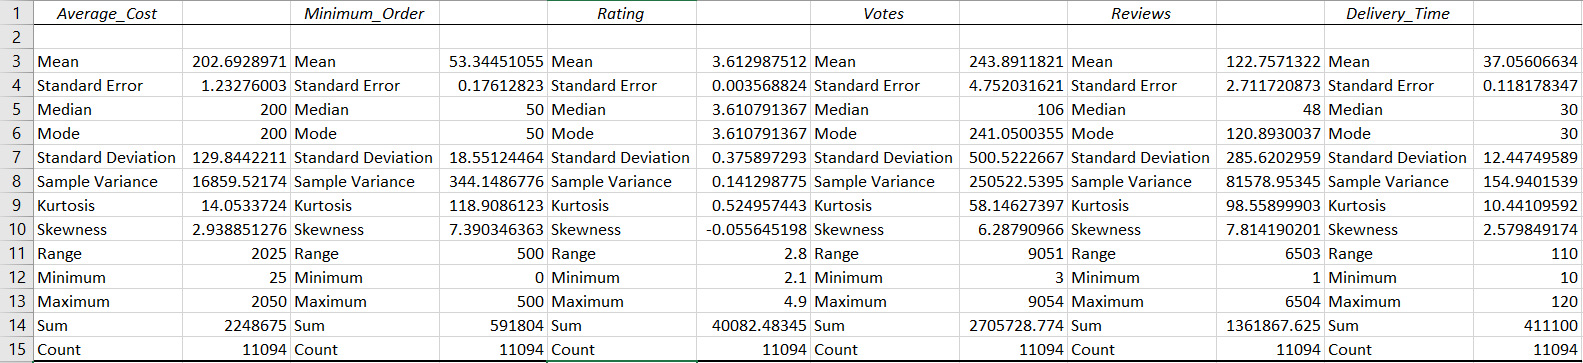

In [56]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm= ols('Average_Cost ~ Delivery_Time',data=df).fit()
table=sm.stats.anova_lm(lm)
print(table)
lm.summary()

                    df        sum_sq       mean_sq           F        PR(>F)
Delivery_Time      1.0  5.738287e+06  5.738287e+06  351.130236  3.714005e-77
Residual       11091.0  1.812528e+08  1.634233e+04         NaN           NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Average_Cost   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     351.1
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           3.71e-77
Time:                        03:23:12   Log-Likelihood:                -69549.
No. Observations:               11093   AIC:                         1.391e+05
Df Residuals:                   11091   BIC:                         1.391e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       134.9982      3.812     35.415      0.000     127.526     142.470
Delivery_Time     1.8272      0.098     18.738      0.000       1.636       2.018
==============================================================================
Omnibus:                     7233.113   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112459.961
Skew:                           2.927   Prob(JB):                         0.00
Kurtosis:                      17.458   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Bangalore map overlay to be used to determine regions that accelarate demand in orders during peak hours
bang_map = folium.Map(location=[12.9716, 77.5946],zoom_start=11.8)
#folium.TileLayer('cartodbpositron').add_to(bang_map)

loca="BBMP.GeoJSON"
folium.GeoJson(loca, name="geojson").add_to(bang_map)

bang_map

FileNotFoundError: ignored


# **swiggy case analysis - 2**

###**Solution:**

The goal here is to ensure that order fulfilment is maximum, with reduced number of failed orders due to the technical outage.

We have 1000 number of queries from orders and increasing to 5000 within the outage duration, in an hour a single agent handles 12 customers, so going by that number we at least need a bare minimum of 85 agents who can resolve the growing order queries provided the 1000 odd incoming chats are within the stipulated hour. The issue chat threads that are created are also dependent on the level of priority given by swiggy depending on the nature of the issue related to the order.

1.	The first line of queries are handled by chatbots and the nature of customer issue gets broken down, by identifying and prioritizing the orders that have order fulfilment related issues we can improve delivery rate.
2.	The first step to ensure if the order fulfillment can be met for those 1000 priority orders by cross checking with the restaurant or the delivery agent.
3.	Since the trackers are offline, the call center personnel can utilize direct means of communication with the agent, restaurant and customer to resolve order issues.
4.	The delivery agent may confirm the order fulfilment to the customer from their end and from the restaurant.
5.	Historically there should be a pattern where order fulfillment has seen periodic failure, either from the delivery agent or the restaurant, concentrating in resolving these orders can help reduce the instances where customer experience gets affected
6.	with internal customer segments, we can prioritize those customers who are likely to use our services more and ensure that fulfillment is maximized on these customer segments, (swiggy super).
7.	Taking this issue to a reporting senior for a potential solution if there is a very low likelihood of other solutions.
